## Val test

In [1]:
import numpy as np
import torch

from models import MPS, ComplexTensor
from utils import build_ghz_plus
from qtools import pauli_exp
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from utils import MeasurementDataset, select_hyperparams_and_train

import matplotlib.pyplot as plt
import datetime
from utils import make_linear_schedule, make_exp_schedule

Loaded libmkl_rt.so for dgesvd


Pick system size, dimensionality of local hilbert space, and initial bond dim

In [2]:
L=4
local_dim=2
bond_dim=2

In [3]:
# dev = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
dev = torch.device("cpu")

Initialize the MPS model

In [4]:
psi = MPS(L=L, local_dim=local_dim, bond_dim=bond_dim)

In [5]:
psi.to(device=dev)

The ground truth state (a ghz state with no phase)

In [6]:
ghz_plus = build_ghz_plus(L)
ghz_plus.to(device=dev)

Samples_tr: lists indices of the observed basis states at each measurement. 0 = spin up, 1 = spin down

settings: array of corresponding angles

In [7]:
# fname_settings = "test_datasets/settings_ghz_plus_random_basis_L=%d.npy"%L
# fname_samples = "test_datasets/samples_ghz_plus_random_basis_L=%d.npy"%L
fname_settings = "datasets/mps_sampled/ghz_plus_L=%d_angles.npy"%L
fname_samples = "datasets/mps_sampled/ghz_plus_L=%d_outcomes.npy"%L
Nsamp=20000
samples = np.load(fname_samples)[:Nsamp]
samples_tr = torch.tensor((1-samples)/2).to(dtype=torch.long,device=dev)
settings = np.load(fname_settings)[:Nsamp]

In [8]:
theta = torch.tensor(settings[...,0],dtype=torch.float32,device=dev)
phi = torch.tensor(settings[...,1],dtype=torch.float32,device=dev)

Holds the unitaries corresponding to each angle

In [9]:
U = pauli_exp(theta, phi)


In [10]:
ds = MeasurementDataset(samples=samples_tr,rotations=U)


In [11]:
batch_size = 1028

Number of epochs of training

In [12]:
epochs = 50

Max number of singular values to keep, and cutoff below which to truncate singular values

In [13]:
max_sv_to_keep = 10
cutoff=1e-4

In [14]:
val_split=.1
Nparam=3

In [15]:
model, logdict, params, trloss, valloss = select_hyperparams_and_train(ds,batch_size, epochs, 
                                                                        val_split=val_split, Nparam=Nparam,
                                                                      cutoff=cutoff,max_sv_to_keep=max_sv_to_keep,
                                                                ground_truth_mps=ghz_plus,use_cache=True,
                                                                    record_s2=True,early_stopping=True,
                                                                      compute_overlaps=True,verbose=True)

Training on 30 different param sets, with 1 seeds each
Training with lr = <function make_exp_schedule.<locals>.f at 0x7f531f7ae6a8>, s2 penalty = <function make_exp_schedule.<locals>.f at 0x7f531f7c4730>
Training on system size 4 with 18000 samples
Finished epoch 0 in 0.611 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Finished epoch 1 in 0.610 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Finished epoch 2 in 0.604 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Finished epoch 3 in 0.606 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Finished epoch 4 in 0.611 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Finished epoch 5 in 0.613 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Val score not decreasing, halting training
Acheived val score: 3.9066624641418457
Training with lr = <function make_exp_schedule.<locals>.f at 0x7f531f7ae598>, s2 penalty = <function make_exp_schedule.<locals>.f at 0x7f531f7c47b8>
Training on system size 4 with 18000 samples
Finished epoc

Finished epoch 11 in 0.627 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 12 in 0.595 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 13 in 0.607 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 14 in 0.606 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 15 in 0.607 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 16 in 0.613 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Val score not decreasing, halting training
Acheived val score: 3.6505918502807617
Training with lr = <function make_exp_schedule.<locals>.f at 0x7f531f7ae9d8>, s2 penalty = <function make_exp_schedule.<locals>.f at 0x7f531f7c4a60>
Training on system size 4 with 18000 samples
Finished epoch 0 in 0.607 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Finished epoch 1 in 0.608 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Finished epoch 2 in 0.593 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Finished epoch 3 in 0.603

Finished epoch 6 in 0.618 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 7 in 0.617 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 8 in 0.623 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 9 in 0.592 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 10 in 0.607 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 11 in 0.609 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 12 in 0.606 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 13 in 0.608 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 14 in 0.609 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 15 in 0.610 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 16 in 0.610 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 17 in 0.593 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 18 in 0.605 sec
Model shape:  [(1, 2), (2, 4), (4, 2)

/home/brian/Code/mps-gm/models.py:71: RuntimeWarning: invalid value encountered in multiply
  return self.real.detach().cpu().numpy() + 1j * self.imag.detach().cpu().numpy()
/home/brian/Code/mps-gm/models.py:735: RuntimeWarning: invalid value encountered in multiply
  return 2 * self.partial_deriv_twosite_renyi2_entropy(site_index).numpy().conj()
/home/brian/Code/mps-gm/utils.py:35: RuntimeWarning: invalid value encountered in greater
  singular_vals = singular_vals[singular_vals>cutoff]


Finished epoch 0 in 0.617 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Finished epoch 1 in 0.622 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Finished epoch 2 in 0.632 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Finished epoch 3 in 0.632 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Finished epoch 4 in 0.608 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Finished epoch 5 in 0.606 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Val score not decreasing, halting training
Acheived val score: 3.712512493133545
Training with lr = <function make_exp_schedule.<locals>.f at 0x7f531f7c41e0>, s2 penalty = <function make_exp_schedule.<locals>.f at 0x7f531f7ae378>
Training on system size 4 with 18000 samples
Finished epoch 0 in 0.618 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 1 in 0.616 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 2 in 0.616 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 3 in 0.594 sec
Mo

Finished epoch 18 in 0.772 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 19 in 0.617 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 20 in 0.619 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 21 in 0.620 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 22 in 0.617 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 23 in 0.618 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 24 in 0.615 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Val score not decreasing, halting training
Acheived val score: 2.4367053508758545
Training with lr = <function make_exp_schedule.<locals>.f at 0x7f531f7c4620>, s2 penalty = <function make_exp_schedule.<locals>.f at 0x7f531f7c5510>
Training on system size 4 with 18000 samples
Finished epoch 0 in 0.618 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 1 in 0.616 sec
Model shape:  [(1, 2), (2, 4), (4, 2), (2, 1)]
Finished epoch 2 in 0.63

In [18]:
params

{'lr_scale': 0.0501543732891142,
 'lr_timescale': 7.710644234963183,
 's2_scale': 0.0845961667858432,
 's2_timescale': 42.34297716150686}

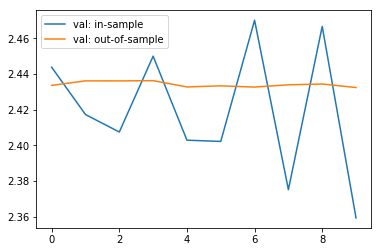

In [19]:
fig, ax = plt.subplots()
plt.plot(trloss, label="val: in-sample")
plt.plot(valloss, label="val: out-of-sample")
plt.legend()

In [23]:
loss = logdict['loss']
eps=len(loss)
fidelity_mps = logdict['fidelity_mps']
overlap = logdict['overlap']

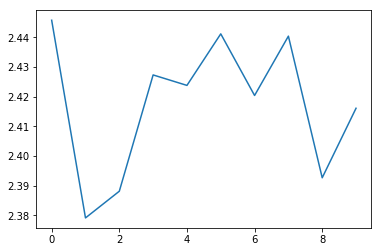

In [21]:
fig, ax = plt.subplots()
plt.plot(loss)

In [25]:
fig, ax = plt.subplots()
plt.plot(np.arange(eps), fidelity_mps**, label='mps')
is_conv = overlap['converged']
plt.errorbar(np.arange(eps)[is_conv], overlap['mean'][is_conv],
                            yerr=overlap['err'][is_conv],
                            linestyle='none', marker='o')

SyntaxError: invalid syntax (<ipython-input-25-5c84f8e6fc87>, line 5)